In [56]:
import numpy as np 
import pandas as pd

In [57]:
# Load the trade log data from the CSV file
df = pd.read_csv('E:\Credit Card Fraud Detection\data\creditcard.csv')

### Scaling "Time" and "Amount" using StandardScaler and RobustScaler 

In [58]:
#Since most of our data has already been scaled we should scale the "Time" and "Amount" columns 
from sklearn.preprocessing import StandardScaler, RobustScaler

df["time_rob_scaled"] = RobustScaler().fit_transform(df['Time'].values.reshape(-1, 1))
df['amount_rob_scaled'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

In [59]:
 df.drop(['Time', 'Amount'], axis = 1, inplace = True)

In [60]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,time_rob_scaled,amount_rob_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


In [61]:
#Re-Naming
scaled_time = df['time_rob_scaled']
scaled_amount = df['amount_rob_scaled']
df.rename(columns={'time_rob_scaled': 'scaled_time', 'amount_rob_scaled': 'scaled_amount'}, inplace=True)

In [62]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


### Splitting the dataset into training and testing sets

In [63]:
# Splitting the dataset into training and testing

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

print("percentage of non fraud is", round(df['Class'].value_counts()[0]/len(df) * 100, 2), "%")
print("percentage of fraud is", round(df['Class'].value_counts()[1]/len(df) * 100, 2), "%")

x = df.drop("Class", axis=1)
y = df['Class']


percentage of non fraud is 99.83 %
percentage of fraud is 0.17 %


In [64]:
x

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.994960,0.670579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,1.034951,-0.296653
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,1.034963,0.038986
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,1.034975,0.641096
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,1.034975,-0.167680


In [65]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

### Dynamically calculate the number of samples to use for both fraud and non-fraud cases 

In [66]:
# Determine the minimum count of the two classes
min_count = min(df['Class'].value_counts())

# Select an equal number of fraud and non-fraud samples
fraud_df = df[df['Class'] == 1].sample(n=min_count)
non_fraud_df = df[df['Class'] == 0].sample(n=min_count)

# Concatenate and shuffle the data
new_df = pd.concat([fraud_df, non_fraud_df]).sample(frac=1, random_state=42)

new_df.shape


(984, 31)

In [67]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
154890,1.959891,-0.207780,-1.689034,-0.034012,1.142849,1.246935,-0.353174,0.296779,1.976139,-0.401745,...,0.964758,0.027892,-1.011247,0.136908,-0.373225,0.014956,-0.083241,0,0.221220,-0.293440
76555,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,1.164431,-4.542447,-7.748480,...,1.092437,0.320133,-0.434643,-0.380687,0.213630,0.423620,-0.105169,1,-0.329750,1.836931
9967,-0.892071,0.879333,1.932299,-0.425302,0.894993,-0.262307,0.597634,-0.025753,0.631348,-1.257627,...,-0.847756,-0.170163,-0.491633,0.219184,0.030440,-0.028808,0.051239,0,-0.820122,-0.279746
30496,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,-7.833556,...,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,1,-0.572598,1.253406
61787,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,-1.394918,-2.892612,...,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,1,-0.407747,4.722979


In [68]:
new_df['Class']

154890    0
76555     1
9967      0
30496     1
61787     1
         ..
93788     1
10498     1
118336    0
234574    1
14338     1
Name: Class, Length: 984, dtype: int64

In [69]:
# Calculate the class ratio in the balanced dataset
class_0_count = new_df[new_df['Class'] == 0]['Class'].count()
class_1_count = new_df[new_df['Class'] == 1]['Class'].count()

class_0_ratio = class_0_count / len(new_df)
class_1_ratio = class_1_count / len(new_df)

print("Class 0/non-Fraud ratio: {:.2f}".format(class_0_ratio))
print("Class 1/Fraud ratio: {:.2f}".format(class_1_ratio))


Class 0/non-Fraud ratio: 0.50
Class 1/Fraud ratio: 0.50


### Distribution Visualization on new_df

Distribution of class in the new df
Class
0    492
1    492
Name: count, dtype: int64
Class
0    0.5
1    0.5
Name: count, dtype: float64


C:\Users\Ananta Chakraborty\AppData\Local\Temp\ipykernel_4348\2827740322.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=new_df, palette='Set2')


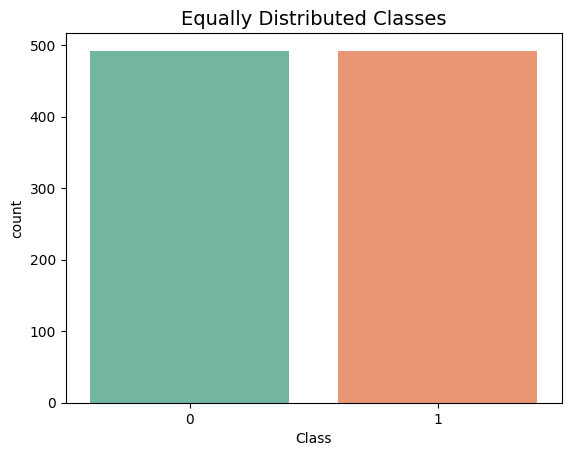

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Distribution of class in the new df")
print(new_df['Class'].value_counts())
print(new_df['Class'].value_counts() / len(new_df))

sns.countplot(x='Class', data=new_df, palette='Set2')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()


### Correlation Analysis of entire dataset df and the new balanced dataset new_df

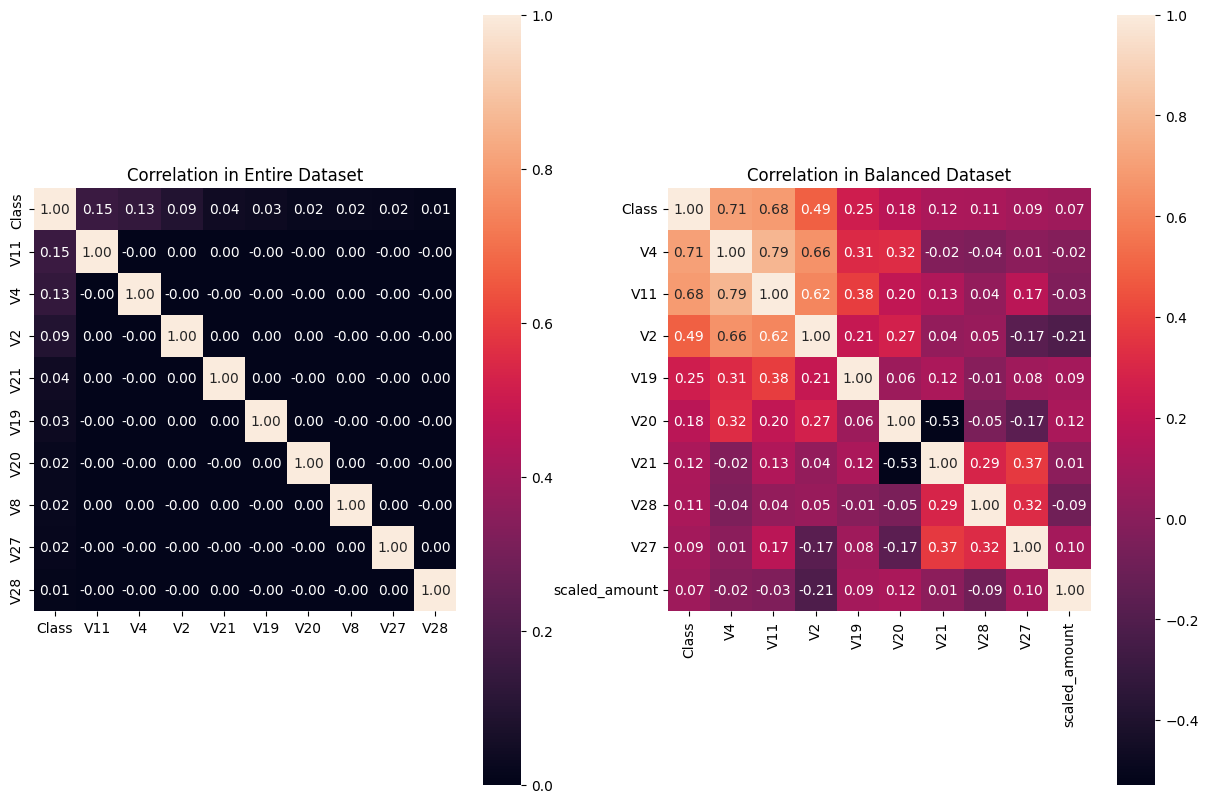

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

# Correlation of entire dataset
corr_1 = df.corr()
k = 10
cols = corr_1.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax=ax1)
ax1.set_title("Correlation in Entire Dataset")

# Correlation of new_df
corr = new_df.corr()
k = 10
cols = corr.nlargest(k, 'Class')['Class'].index
cm = np.corrcoef(new_df[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, ax=ax2)
ax2.set_title("Correlation in Balanced Dataset")

plt.show()


### Identifying Negatively & Positively Correlated Features 

In [96]:
# Finding variables that have a Negative correlation with the 'Class' variable
corr[corr['Class']<0]['Class'].sort_values().head(10)

V14   -0.746674
V12   -0.683296
V10   -0.625135
V16   -0.599017
V3    -0.577061
V9    -0.560615
V17   -0.558547
V7    -0.475100
V18   -0.471674
V1    -0.430986
Name: Class, dtype: float64

In [97]:
# Finding variables that have a Positive correlation with the 'Class' variable
corr[corr['Class']>0]['Class'].sort_values().head(10)

V26              0.039552
V25              0.041079
V8               0.055915
scaled_amount    0.070160
V27              0.088691
V28              0.111231
V21              0.117928
V20              0.175856
V19              0.252175
V2               0.492045
Name: Class, dtype: float64

### Creating Boxplots for Features that are highly Correlated (Negative + Positive)

In [108]:
# Boxplot for variables which are highly correlater for new_df

corr_1 = new_df.corr()

k = 10

cols = corr_1.nlargest (k, 'Class')['Class'].index.tolist()
cols.remove('Class')

for i in cols:
  print(i)

print("Number of selected features:", len(cols))

V4
V11
V2
V19
V20
V21
V28
V27
scaled_amount
Number of selected features: 9


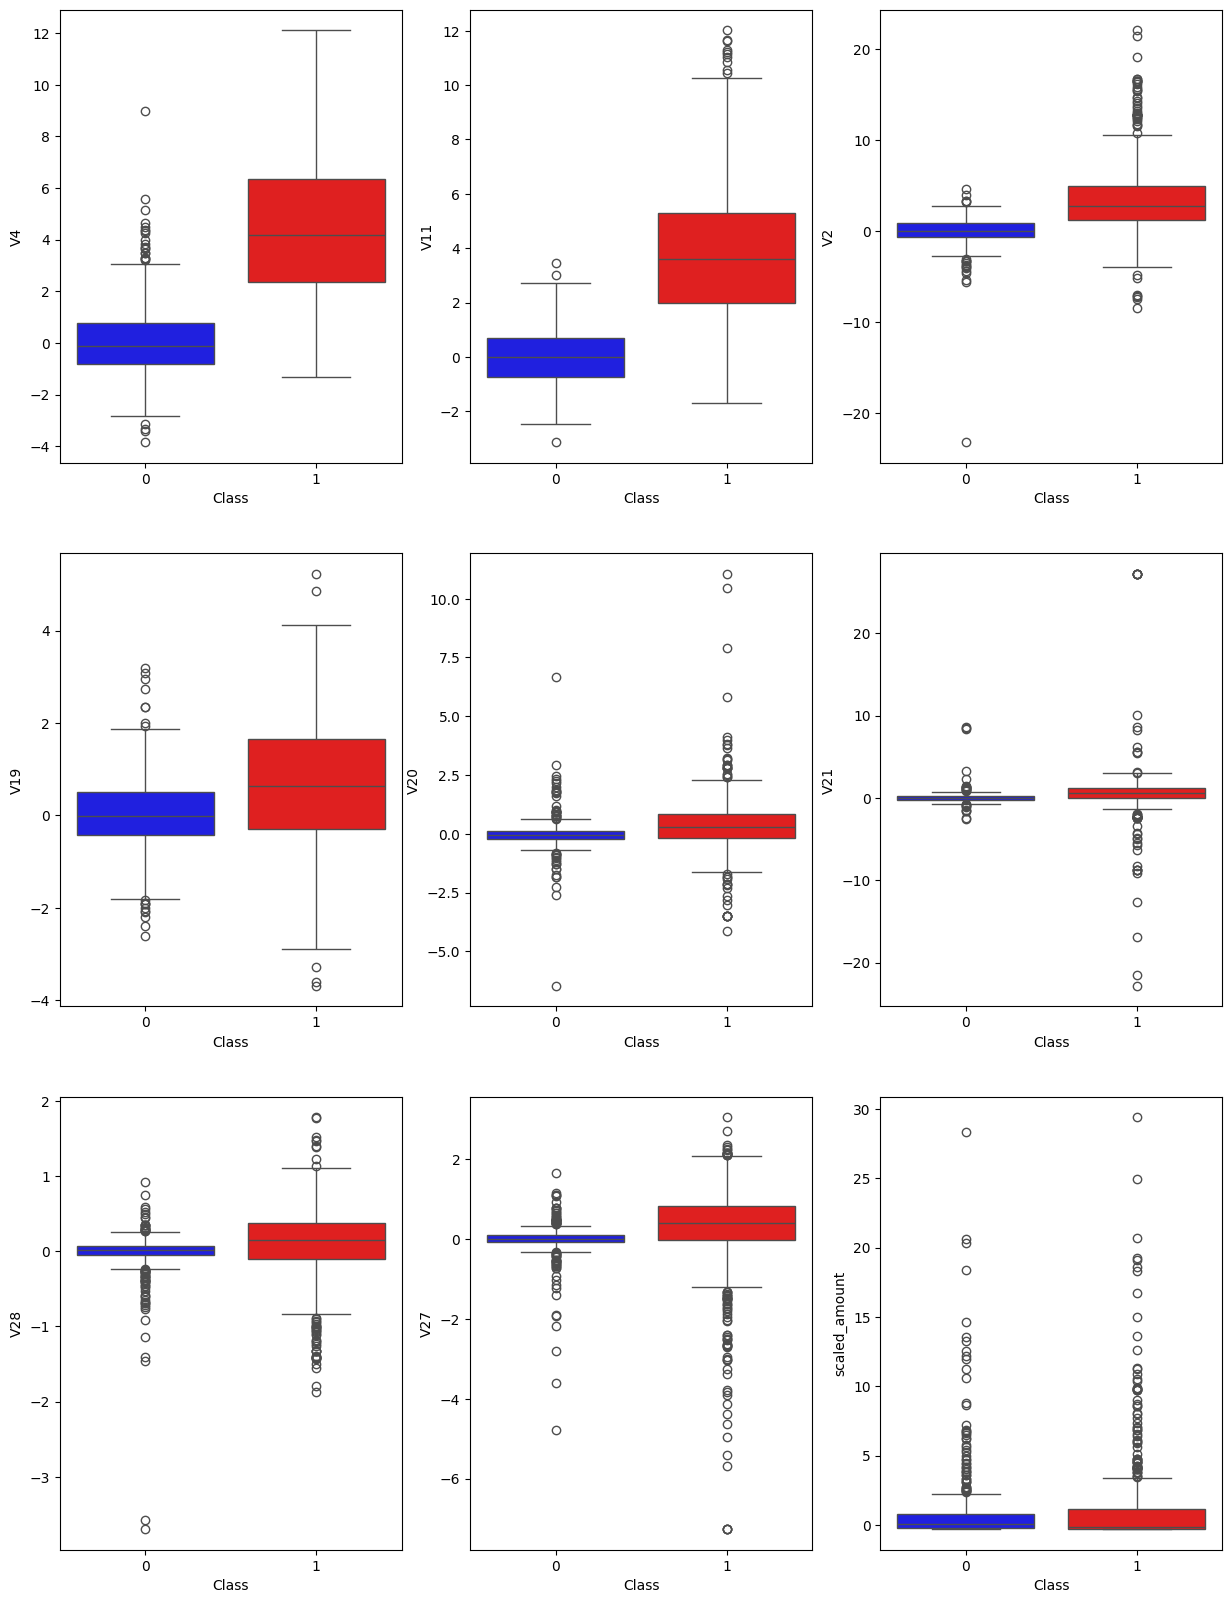

In [109]:
# Creates a grid of subplots where each subplot is a boxplot for a different feature from the cols list

colors = ['blue', 'red']

y = 0

f, axes = plt.subplots(round(len(cols) / 3), 3, figsize=(15, 20))

for i in range(len(cols)):
    z, j = divmod(y, 3)
    fig = sns.boxplot(x="Class", y=cols[i], data=new_df, hue="Class", palette=colors, ax=axes[z, j])
    fig.get_legend().remove()
    y = y + 1

plt.show()


In [103]:
# Reindexing DataFrames for Consistency and Clarity

x=pd.DataFrame(new_df)
x.reset_index(inplace=True)
x.head()

,index,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,154890,1.959891,-0.207780,-1.689034,-0.034012,1.142849,1.246935,-0.353174,0.296779,1.976139,...,0.964758,0.027892,-1.011247,0.136908,-0.373225,0.014956,-0.083241,0,0.221220,-0.293440
1,76555,-7.901421,2.720472,-7.885936,6.348334,-5.480119,-0.333059,-8.682376,1.164431,-4.542447,...,1.092437,0.320133,-0.434643,-0.380687,0.213630,0.423620,-0.105169,1,-0.329750,1.836931
2,9967,-0.892071,0.879333,1.932299,-0.425302,0.894993,-0.262307,0.597634,-0.025753,0.631348,...,-0.847756,-0.170163,-0.491633,0.219184,0.030440,-0.028808,0.051239,0,-0.820122,-0.279746
3,30496,-4.844372,5.649439,-6.730396,5.252842,-4.409566,-1.740767,-6.311699,3.449167,-5.416284,...,-0.845753,0.190674,-0.216443,-0.325033,-0.270328,0.210214,0.391855,1,-0.572598,1.253406
4,61787,-1.554216,1.694229,-0.903334,2.425436,-2.899787,0.133028,-0.286226,0.555945,-1.394918,...,0.733393,0.202350,0.492054,-0.183791,-0.199917,0.395201,0.027693,1,-0.407747,4.722979


### Creating histograms of specific features for transactions that are labeled as "fraud" (Class == 1) 

1.Fitting two curves on the histograms: a black curve (theoretical probability density function) and a yellowish curve (kernel density estimate).

2.Interpreting the graphs:

i) If the black and yellowish curves closely overlap, it suggests that the distribution of the data is approximately normal. This means the data points for the specific feature are concentrated around the mean, and the distribution is symmetric.

ii) If the black curve (normal distribution) fits closely to the histogram but the yellowish KDE curve deviates or has multiple peaks, it indicates that the data may have some deviations from a perfect normal distribution.

iii) If the black and yellowish curves differ significantly, it suggests that the data does not follow a normal distribution, and the underlying distribution might be different.

C:\Users\Ananta Chakraborty\AppData\Local\Temp\ipykernel_4348\2670190199.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, fit=norm, color='#FB8861', ax=axes[z, j])
C:\Users\Ananta Chakraborty\AppData\Local\Temp\ipykernel_4348\2670190199.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot

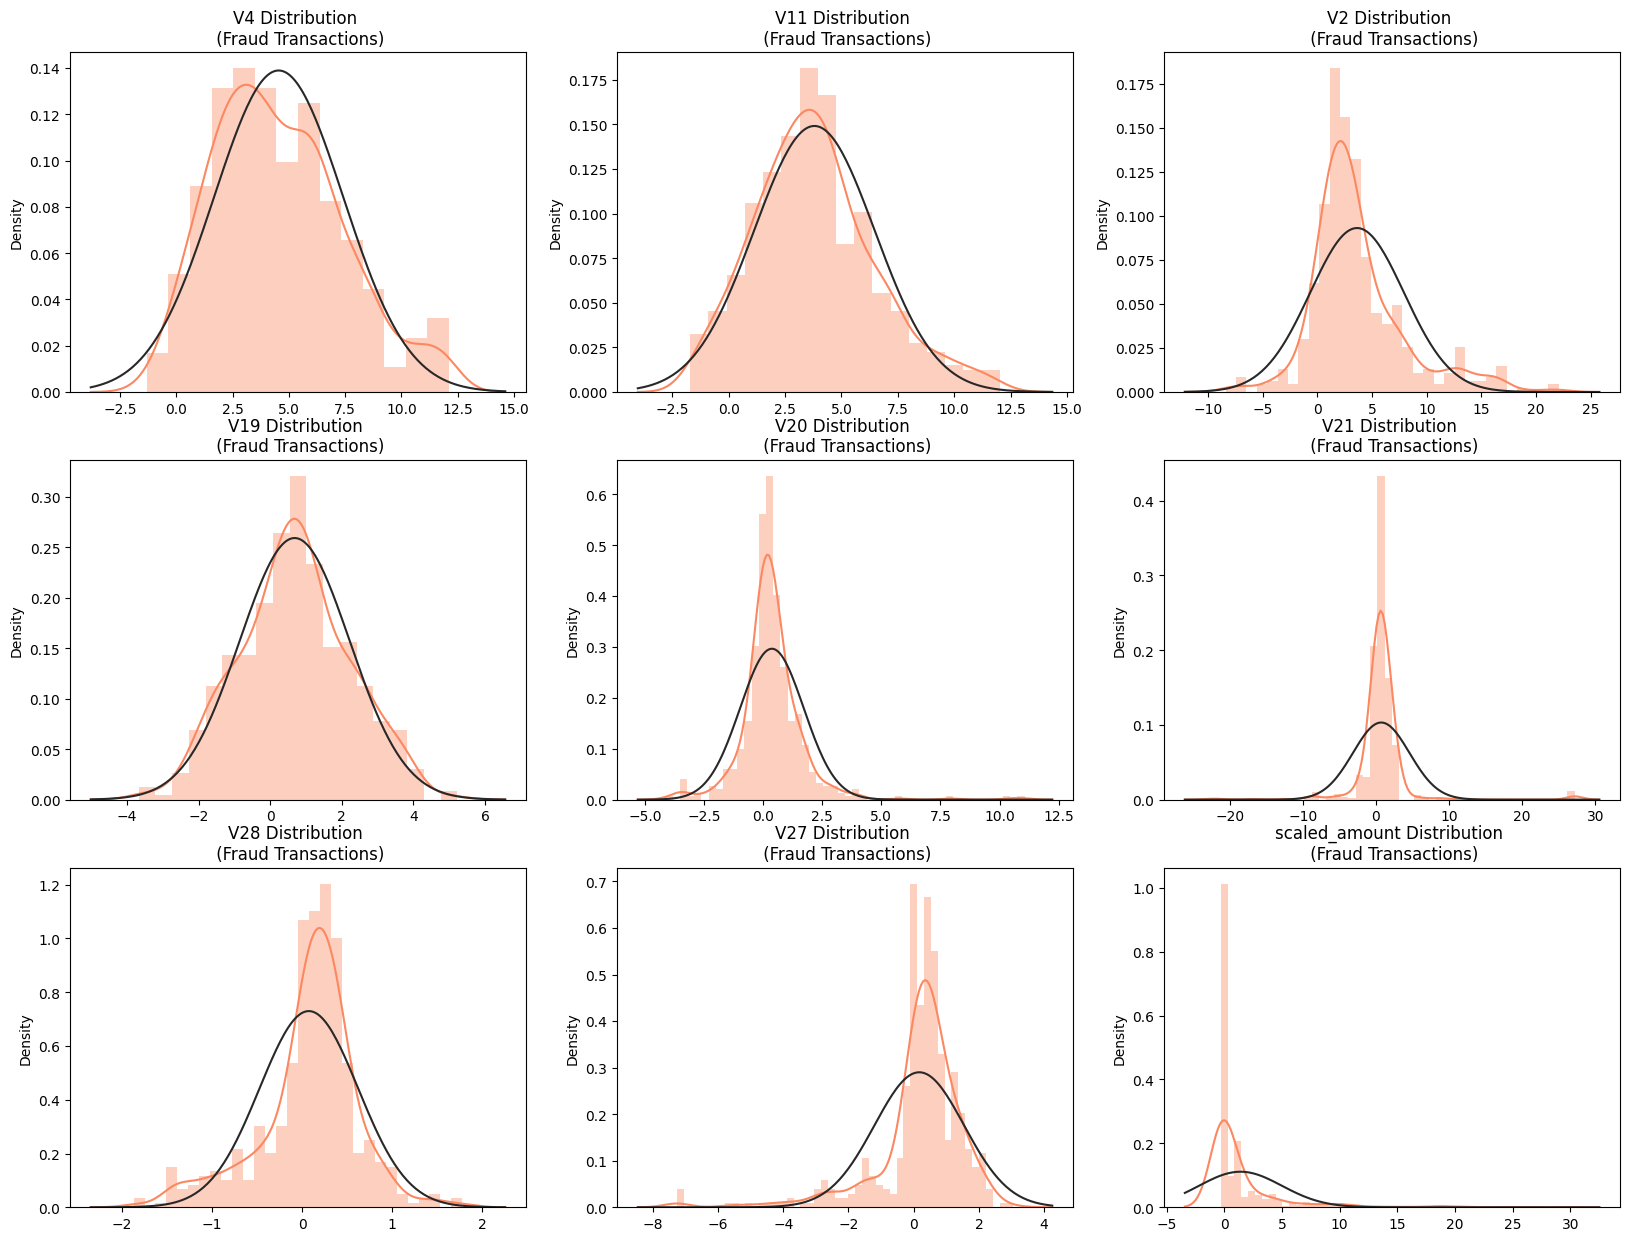

In [104]:
from scipy.stats import norm

y = 0
f, axes = plt.subplots(round(len(cols) / 3), 3, figsize=(20, 15))

for i in range(len(cols)):
    z, j = divmod(y, 3)
    
    x = new_df.loc[new_df['Class'] == 1, cols[i]].values

    sns.distplot(x, fit=norm, color='#FB8861', ax=axes[z, j])
    axes[z, j].set_title('{} Distribution \n (Fraud Transactions)'.format(cols[i]))
    y += 1


In [80]:
new_df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'scaled_time',
       'scaled_amount'],
      dtype='object')